In [1]:
import numpy as np
import matplotlib.pyplot as plt


from hnc import  HNC_solver
from qsps import *


# Two Species

Here we do QSP interactions between electrons and one ion type. 

Using $\tilde{r}\equiv r/r_s$, we implement potentials 
\begin{align}
\beta v_{ee}(\tilde{r}) &=  \frac{\Gamma_{ee}}{\tilde{r}}\left( 1- \exp[-\tilde{r} r_s/\Lambda_e]\right) +  \ln2 \exp\left[-\tilde{r}^2 r_s^2/(\pi \Lambda_e^2 \ln 2)\right]\\
\beta v_{ei}(\tilde{r}) &=  \frac{\Gamma_{ei}}{\tilde{r}}\left( 1- \exp[-\tilde{r} r_s/\Lambda_e]\right)\\
\beta v_{ii}(\tilde{r}) &=  \frac{\Gamma_{ii}}{\tilde{r}}
\end{align}
For  
\begin{align}
\Gamma_{ee}&=\frac{\beta e^2}{r_s}\\
\Gamma_{ei}&=\frac{\beta Z_i e^2}{r_s}\\
\Gamma_{ii}&=\frac{\beta Z_i^2 e^2}{r_s}\\
\end{align}

Plug into get potentials

In [ ]:
T1=2
T2=2
T3=23
T4=22

In [11]:
ri = QSP_HNC.rs_from_n(5.01e23*1e6 *aB**3)
# ri = 3
Te = T1*eV 
Ti   = T1*eV 
Z, A = 6,12
Zstar= 3
    
qsp = QSP_HNC(Z, A, Zstar, Te, Ti, ri)

N_species = 2
Gamma = np.array(  [[qsp.Γii,  qsp.Γei],
                    [qsp.Γei,  qsp.Γee]])


names = ["Ion-1", "Electron", ] 
kappa = 1
rho = np.array([  3/(4*np.pi), Zstar*3/(4*np.pi) ])
hnc1 = HNC_solver(N_species, Gamma=Gamma, kappa=kappa, tol=1e-8,
                 kappa_multiscale=1, rho = rho, num_iterations=int(1e3), 
                 R_max=5, N_bins=1000, names=names, dst_type=3)

βu_r_matrix = np.array([[qsp.βvii(hnc1.r_array), qsp.βvei(hnc1.r_array)],
                        [qsp.βvei(hnc1.r_array), qsp.βvee(hnc1.r_array)]])

hnc1.set_βu_matrix(βu_r_matrix)
hnc1.initialize_c_k()
hnc1.set_C_matrix()
hnc1.HNC_solve(alpha_method='best', alpha_Picard = 1e-2, alpha_oz = 0e-4, h_max=1e4)

Λee = 0.329
Λei = 0.232
Γii=331.826, Γie=-1.501, Γee=0.500 
r_i=1.476
r_e=1.023
θ  =1.05e-02
 HNC min: [0.5] True Optimization terminated successfully.
0: Err in c_r: 5.11e+02, OZ: 2.09e-01, HNC: 1.28e-02
 HNC min: [0.5] True Optimization terminated successfully.
1: Err in c_r: 2.96e+02, OZ: 1.96e-01, HNC: 7.44e-03
 HNC min: [0.5] True Optimization terminated successfully.
2: Err in c_r: 1.72e+02, OZ: 1.84e-01, HNC: 1.47e-01
 HNC min: [0.5] True Optimization terminated successfully.
3: Err in c_r: 1.02e+02, OZ: 1.65e-01, HNC: 4.83e+04
 HNC min: [0.5] True Optimization terminated successfully.
4: Err in c_r: 6.24e+01, OZ: 1.67e-01, HNC: 2.56e-01
 HNC min: [0.01] False Maximum number of iterations has been exceeded.
5: Err in c_r: 8.15e-01, OZ: 3.21e-01, HNC: inf
 HNC min: [0.5] True Optimization terminated successfully.
6: Err in c_r: 4.01e+01, OZ: 1.27e-01, HNC: 4.82e+27
 HNC min: [0.5] True Optimization terminated successfully.
7: Err in c_r: 2.70e+01, OZ: 1.62e-01, HNC: 2.11e-02
 HNC

 HNC min: [0.5] True Optimization terminated successfully.
73: Err in c_r: 6.60e-01, OZ: 1.13e-01, HNC: 9.62e-02
 HNC min: [0.5] True Optimization terminated successfully.
74: Err in c_r: 6.46e-01, OZ: 1.13e-01, HNC: 9.25e-02
 HNC min: [0.5] True Optimization terminated successfully.
75: Err in c_r: 6.33e-01, OZ: 1.13e-01, HNC: 8.89e-02
 HNC min: [0.5] True Optimization terminated successfully.
76: Err in c_r: 6.20e-01, OZ: 1.13e-01, HNC: 8.56e-02
 HNC min: [0.5] True Optimization terminated successfully.
77: Err in c_r: 6.07e-01, OZ: 1.14e-01, HNC: 8.24e-02
 HNC min: [0.5] True Optimization terminated successfully.
78: Err in c_r: 5.95e-01, OZ: 1.14e-01, HNC: 7.95e-02
 HNC min: [0.5] True Optimization terminated successfully.
79: Err in c_r: 5.84e-01, OZ: 1.14e-01, HNC: 7.66e-02
 HNC min: [0.5] True Optimization terminated successfully.
80: Err in c_r: 5.72e-01, OZ: 1.15e-01, HNC: 7.39e-02
 HNC min: [0.5] True Optimization terminated successfully.
81: Err in c_r: 5.61e-01, OZ: 1.15e-0

 HNC min: [0.5] True Optimization terminated successfully.
147: Err in c_r: 2.06e-01, OZ: 1.37e-01, HNC: 1.51e-02
 HNC min: [0.5] True Optimization terminated successfully.
148: Err in c_r: 2.03e-01, OZ: 1.38e-01, HNC: 1.48e-02
 HNC min: [0.5] True Optimization terminated successfully.
149: Err in c_r: 2.01e-01, OZ: 1.38e-01, HNC: 1.45e-02
 HNC min: [0.5] True Optimization terminated successfully.
150: Err in c_r: 1.98e-01, OZ: 1.38e-01, HNC: 1.42e-02
 HNC min: [0.5] True Optimization terminated successfully.
151: Err in c_r: 1.96e-01, OZ: 1.39e-01, HNC: 1.39e-02
 HNC min: [0.5] True Optimization terminated successfully.
152: Err in c_r: 1.93e-01, OZ: 1.39e-01, HNC: 1.36e-02
 HNC min: [0.5] True Optimization terminated successfully.
153: Err in c_r: 1.91e-01, OZ: 1.40e-01, HNC: 1.34e-02
 HNC min: [0.5] True Optimization terminated successfully.
154: Err in c_r: 1.89e-01, OZ: 1.40e-01, HNC: 1.31e-02
 HNC min: [0.5] True Optimization terminated successfully.
155: Err in c_r: 1.87e-01, OZ

 HNC min: [0.5] True Optimization terminated successfully.
226: Err in c_r: 8.41e-02, OZ: 1.61e-01, HNC: 4.84e-03
 HNC min: [0.5] True Optimization terminated successfully.
227: Err in c_r: 8.33e-02, OZ: 1.61e-01, HNC: 4.75e-03
 HNC min: [0.5] True Optimization terminated successfully.
228: Err in c_r: 8.25e-02, OZ: 1.62e-01, HNC: 4.66e-03
 HNC min: [0.5] True Optimization terminated successfully.
229: Err in c_r: 8.17e-02, OZ: 1.62e-01, HNC: 4.58e-03
 HNC min: [0.5] True Optimization terminated successfully.
230: Err in c_r: 8.09e-02, OZ: 1.63e-01, HNC: 4.49e-03
 HNC min: [0.5] True Optimization terminated successfully.
231: Err in c_r: 8.02e-02, OZ: 1.63e-01, HNC: 4.41e-03
 HNC min: [0.5] True Optimization terminated successfully.
232: Err in c_r: 7.94e-02, OZ: 1.64e-01, HNC: 4.33e-03
 HNC min: [0.5] True Optimization terminated successfully.
233: Err in c_r: 7.87e-02, OZ: 1.64e-01, HNC: 4.25e-03
 HNC min: [0.5] True Optimization terminated successfully.
234: Err in c_r: 7.80e-02, OZ

 HNC min: [0.5] True Optimization terminated successfully.
298: Err in c_r: 4.65e-02, OZ: 1.77e-01, HNC: 2.22e-03
 HNC min: [0.5] True Optimization terminated successfully.
299: Err in c_r: 4.61e-02, OZ: 1.77e-01, HNC: 2.21e-03
 HNC min: [0.5] True Optimization terminated successfully.
300: Err in c_r: 4.57e-02, OZ: 1.77e-01, HNC: 2.20e-03
 HNC min: [0.5] True Optimization terminated successfully.
301: Err in c_r: 4.53e-02, OZ: 1.77e-01, HNC: 2.20e-03
 HNC min: [0.5] True Optimization terminated successfully.
302: Err in c_r: 4.49e-02, OZ: 1.77e-01, HNC: 2.19e-03
 HNC min: [0.5] True Optimization terminated successfully.
303: Err in c_r: 4.45e-02, OZ: 1.77e-01, HNC: 2.18e-03
 HNC min: [0.5] True Optimization terminated successfully.
304: Err in c_r: 4.41e-02, OZ: 1.77e-01, HNC: 2.17e-03
 HNC min: [0.5] True Optimization terminated successfully.
305: Err in c_r: 4.37e-02, OZ: 1.77e-01, HNC: 2.16e-03
 HNC min: [0.5] True Optimization terminated successfully.
306: Err in c_r: 4.33e-02, OZ

 HNC min: [0.5] True Optimization terminated successfully.
375: Err in c_r: 2.12e-02, OZ: 1.75e-01, HNC: 1.33e-03
 HNC min: [0.5] True Optimization terminated successfully.
376: Err in c_r: 2.09e-02, OZ: 1.75e-01, HNC: 1.31e-03
 HNC min: [0.5] True Optimization terminated successfully.
377: Err in c_r: 2.07e-02, OZ: 1.75e-01, HNC: 1.30e-03
 HNC min: [0.5] True Optimization terminated successfully.
378: Err in c_r: 2.05e-02, OZ: 1.75e-01, HNC: 1.29e-03
 HNC min: [0.5] True Optimization terminated successfully.
379: Err in c_r: 2.02e-02, OZ: 1.75e-01, HNC: 1.27e-03
 HNC min: [0.5] True Optimization terminated successfully.
380: Err in c_r: 2.00e-02, OZ: 1.75e-01, HNC: 1.26e-03
 HNC min: [0.5] True Optimization terminated successfully.
381: Err in c_r: 1.98e-02, OZ: 1.76e-01, HNC: 1.25e-03
 HNC min: [0.5] True Optimization terminated successfully.
382: Err in c_r: 1.95e-02, OZ: 1.76e-01, HNC: 1.23e-03
 HNC min: [0.5] True Optimization terminated successfully.
383: Err in c_r: 1.93e-02, OZ

 HNC min: [0.5] True Optimization terminated successfully.
448: Err in c_r: 9.33e-03, OZ: 1.79e-01, HNC: 5.71e-04
 HNC min: [0.5] True Optimization terminated successfully.
449: Err in c_r: 9.22e-03, OZ: 1.79e-01, HNC: 5.64e-04
 HNC min: [0.5] True Optimization terminated successfully.
450: Err in c_r: 9.12e-03, OZ: 1.79e-01, HNC: 5.58e-04
 HNC min: [0.5] True Optimization terminated successfully.
451: Err in c_r: 9.03e-03, OZ: 1.79e-01, HNC: 5.51e-04
 HNC min: [0.5] True Optimization terminated successfully.
452: Err in c_r: 8.93e-03, OZ: 1.79e-01, HNC: 5.45e-04
 HNC min: [0.5] True Optimization terminated successfully.
453: Err in c_r: 8.83e-03, OZ: 1.79e-01, HNC: 5.38e-04
 HNC min: [0.5] True Optimization terminated successfully.
454: Err in c_r: 8.74e-03, OZ: 1.79e-01, HNC: 5.32e-04
 HNC min: [0.5] True Optimization terminated successfully.
455: Err in c_r: 8.64e-03, OZ: 1.80e-01, HNC: 5.26e-04
 HNC min: [0.5] True Optimization terminated successfully.
456: Err in c_r: 8.55e-03, OZ

 HNC min: [0.5] True Optimization terminated successfully.
521: Err in c_r: 4.34e-03, OZ: 1.82e-01, HNC: 2.50e-04
 HNC min: [0.5] True Optimization terminated successfully.
522: Err in c_r: 4.30e-03, OZ: 1.83e-01, HNC: 2.48e-04
 HNC min: [0.5] True Optimization terminated successfully.
523: Err in c_r: 4.25e-03, OZ: 1.83e-01, HNC: 2.45e-04
 HNC min: [0.5] True Optimization terminated successfully.
524: Err in c_r: 4.21e-03, OZ: 1.83e-01, HNC: 2.42e-04
 HNC min: [0.5] True Optimization terminated successfully.
525: Err in c_r: 4.17e-03, OZ: 1.83e-01, HNC: 2.40e-04
 HNC min: [0.5] True Optimization terminated successfully.
526: Err in c_r: 4.13e-03, OZ: 1.83e-01, HNC: 2.37e-04
 HNC min: [0.5] True Optimization terminated successfully.
527: Err in c_r: 4.08e-03, OZ: 1.83e-01, HNC: 2.35e-04
 HNC min: [0.5] True Optimization terminated successfully.
528: Err in c_r: 4.04e-03, OZ: 1.83e-01, HNC: 2.32e-04
 HNC min: [0.5] True Optimization terminated successfully.
529: Err in c_r: 4.00e-03, OZ

 HNC min: [0.5] True Optimization terminated successfully.
599: Err in c_r: 2.01e-03, OZ: 1.84e-01, HNC: 1.12e-04
 HNC min: [0.5] True Optimization terminated successfully.
600: Err in c_r: 1.99e-03, OZ: 1.85e-01, HNC: 1.10e-04
 HNC min: [0.5] True Optimization terminated successfully.
601: Err in c_r: 1.97e-03, OZ: 1.85e-01, HNC: 1.09e-04
 HNC min: [0.5] True Optimization terminated successfully.
602: Err in c_r: 1.95e-03, OZ: 1.85e-01, HNC: 1.08e-04
 HNC min: [0.5] True Optimization terminated successfully.
603: Err in c_r: 1.93e-03, OZ: 1.85e-01, HNC: 1.07e-04
 HNC min: [0.5] True Optimization terminated successfully.
604: Err in c_r: 1.91e-03, OZ: 1.85e-01, HNC: 1.06e-04
 HNC min: [0.5] True Optimization terminated successfully.
605: Err in c_r: 1.89e-03, OZ: 1.85e-01, HNC: 1.05e-04
 HNC min: [0.5] True Optimization terminated successfully.
606: Err in c_r: 1.88e-03, OZ: 1.85e-01, HNC: 1.04e-04
 HNC min: [0.5] True Optimization terminated successfully.
607: Err in c_r: 1.86e-03, OZ

 HNC min: [0.5] True Optimization terminated successfully.
674: Err in c_r: 9.79e-04, OZ: 1.85e-01, HNC: 5.34e-05
 HNC min: [0.5] True Optimization terminated successfully.
675: Err in c_r: 9.70e-04, OZ: 1.85e-01, HNC: 5.29e-05
 HNC min: [0.5] True Optimization terminated successfully.
676: Err in c_r: 9.61e-04, OZ: 1.85e-01, HNC: 5.24e-05
 HNC min: [0.5] True Optimization terminated successfully.
677: Err in c_r: 9.52e-04, OZ: 1.85e-01, HNC: 5.19e-05
 HNC min: [0.5] True Optimization terminated successfully.
678: Err in c_r: 9.43e-04, OZ: 1.85e-01, HNC: 5.14e-05
 HNC min: [0.5] True Optimization terminated successfully.
679: Err in c_r: 9.34e-04, OZ: 1.85e-01, HNC: 5.09e-05
 HNC min: [0.5] True Optimization terminated successfully.
680: Err in c_r: 9.25e-04, OZ: 1.86e-01, HNC: 5.04e-05
 HNC min: [0.5] True Optimization terminated successfully.
681: Err in c_r: 9.16e-04, OZ: 1.86e-01, HNC: 4.99e-05
 HNC min: [0.5] True Optimization terminated successfully.
682: Err in c_r: 9.08e-04, OZ

 HNC min: [0.5] True Optimization terminated successfully.
747: Err in c_r: 4.92e-04, OZ: 1.86e-01, HNC: 2.66e-05
 HNC min: [0.5] True Optimization terminated successfully.
748: Err in c_r: 4.88e-04, OZ: 1.86e-01, HNC: 2.63e-05
 HNC min: [0.5] True Optimization terminated successfully.
749: Err in c_r: 4.83e-04, OZ: 1.86e-01, HNC: 2.61e-05
 HNC min: [0.5] True Optimization terminated successfully.
750: Err in c_r: 4.79e-04, OZ: 1.86e-01, HNC: 2.59e-05
 HNC min: [0.5] True Optimization terminated successfully.
751: Err in c_r: 4.74e-04, OZ: 1.86e-01, HNC: 2.56e-05
 HNC min: [0.5] True Optimization terminated successfully.
752: Err in c_r: 4.70e-04, OZ: 1.86e-01, HNC: 2.54e-05
 HNC min: [0.5] True Optimization terminated successfully.
753: Err in c_r: 4.65e-04, OZ: 1.86e-01, HNC: 2.51e-05
 HNC min: [0.5] True Optimization terminated successfully.
754: Err in c_r: 4.61e-04, OZ: 1.86e-01, HNC: 2.49e-05
 HNC min: [0.5] True Optimization terminated successfully.
755: Err in c_r: 4.57e-04, OZ

 HNC min: [0.5] True Optimization terminated successfully.
824: Err in c_r: 2.40e-04, OZ: 1.86e-01, HNC: 1.29e-05
 HNC min: [0.5] True Optimization terminated successfully.
825: Err in c_r: 2.38e-04, OZ: 1.86e-01, HNC: 1.28e-05
 HNC min: [0.5] True Optimization terminated successfully.
826: Err in c_r: 2.35e-04, OZ: 1.86e-01, HNC: 1.27e-05
 HNC min: [0.5] True Optimization terminated successfully.
827: Err in c_r: 2.33e-04, OZ: 1.86e-01, HNC: 1.25e-05
 HNC min: [0.5] True Optimization terminated successfully.
828: Err in c_r: 2.31e-04, OZ: 1.86e-01, HNC: 1.24e-05
 HNC min: [0.5] True Optimization terminated successfully.
829: Err in c_r: 2.29e-04, OZ: 1.86e-01, HNC: 1.23e-05
 HNC min: [0.5] True Optimization terminated successfully.
830: Err in c_r: 2.27e-04, OZ: 1.86e-01, HNC: 1.22e-05
 HNC min: [0.5] True Optimization terminated successfully.
831: Err in c_r: 2.25e-04, OZ: 1.86e-01, HNC: 1.21e-05
 HNC min: [0.5] True Optimization terminated successfully.
832: Err in c_r: 2.23e-04, OZ

 HNC min: [0.5] True Optimization terminated successfully.
896: Err in c_r: 1.23e-04, OZ: 1.86e-01, HNC: 6.58e-06
 HNC min: [0.5] True Optimization terminated successfully.
897: Err in c_r: 1.22e-04, OZ: 1.86e-01, HNC: 6.52e-06
 HNC min: [0.5] True Optimization terminated successfully.
898: Err in c_r: 1.20e-04, OZ: 1.86e-01, HNC: 6.46e-06
 HNC min: [0.5] True Optimization terminated successfully.
899: Err in c_r: 1.19e-04, OZ: 1.86e-01, HNC: 6.40e-06
 HNC min: [0.5] True Optimization terminated successfully.
900: Err in c_r: 1.18e-04, OZ: 1.86e-01, HNC: 6.34e-06
 HNC min: [0.5] True Optimization terminated successfully.
901: Err in c_r: 1.17e-04, OZ: 1.86e-01, HNC: 6.28e-06
 HNC min: [0.5] True Optimization terminated successfully.
902: Err in c_r: 1.16e-04, OZ: 1.86e-01, HNC: 6.23e-06
 HNC min: [0.5] True Optimization terminated successfully.
903: Err in c_r: 1.15e-04, OZ: 1.86e-01, HNC: 6.17e-06
 HNC min: [0.5] True Optimization terminated successfully.
904: Err in c_r: 1.14e-04, OZ

 HNC min: [0.5] True Optimization terminated successfully.
969: Err in c_r: 6.23e-05, OZ: 1.86e-01, HNC: 3.34e-06
 HNC min: [0.5] True Optimization terminated successfully.
970: Err in c_r: 6.18e-05, OZ: 1.86e-01, HNC: 3.31e-06
 HNC min: [0.5] True Optimization terminated successfully.
971: Err in c_r: 6.12e-05, OZ: 1.86e-01, HNC: 3.28e-06
 HNC min: [0.5] True Optimization terminated successfully.
972: Err in c_r: 6.06e-05, OZ: 1.86e-01, HNC: 3.25e-06
 HNC min: [0.5] True Optimization terminated successfully.
973: Err in c_r: 6.01e-05, OZ: 1.86e-01, HNC: 3.22e-06
 HNC min: [0.5] True Optimization terminated successfully.
974: Err in c_r: 5.95e-05, OZ: 1.86e-01, HNC: 3.19e-06
 HNC min: [0.5] True Optimization terminated successfully.
975: Err in c_r: 5.90e-05, OZ: 1.86e-01, HNC: 3.16e-06
 HNC min: [0.5] True Optimization terminated successfully.
976: Err in c_r: 5.84e-05, OZ: 1.86e-01, HNC: 3.13e-06
 HNC min: [0.5] True Optimization terminated successfully.
977: Err in c_r: 5.79e-05, OZ

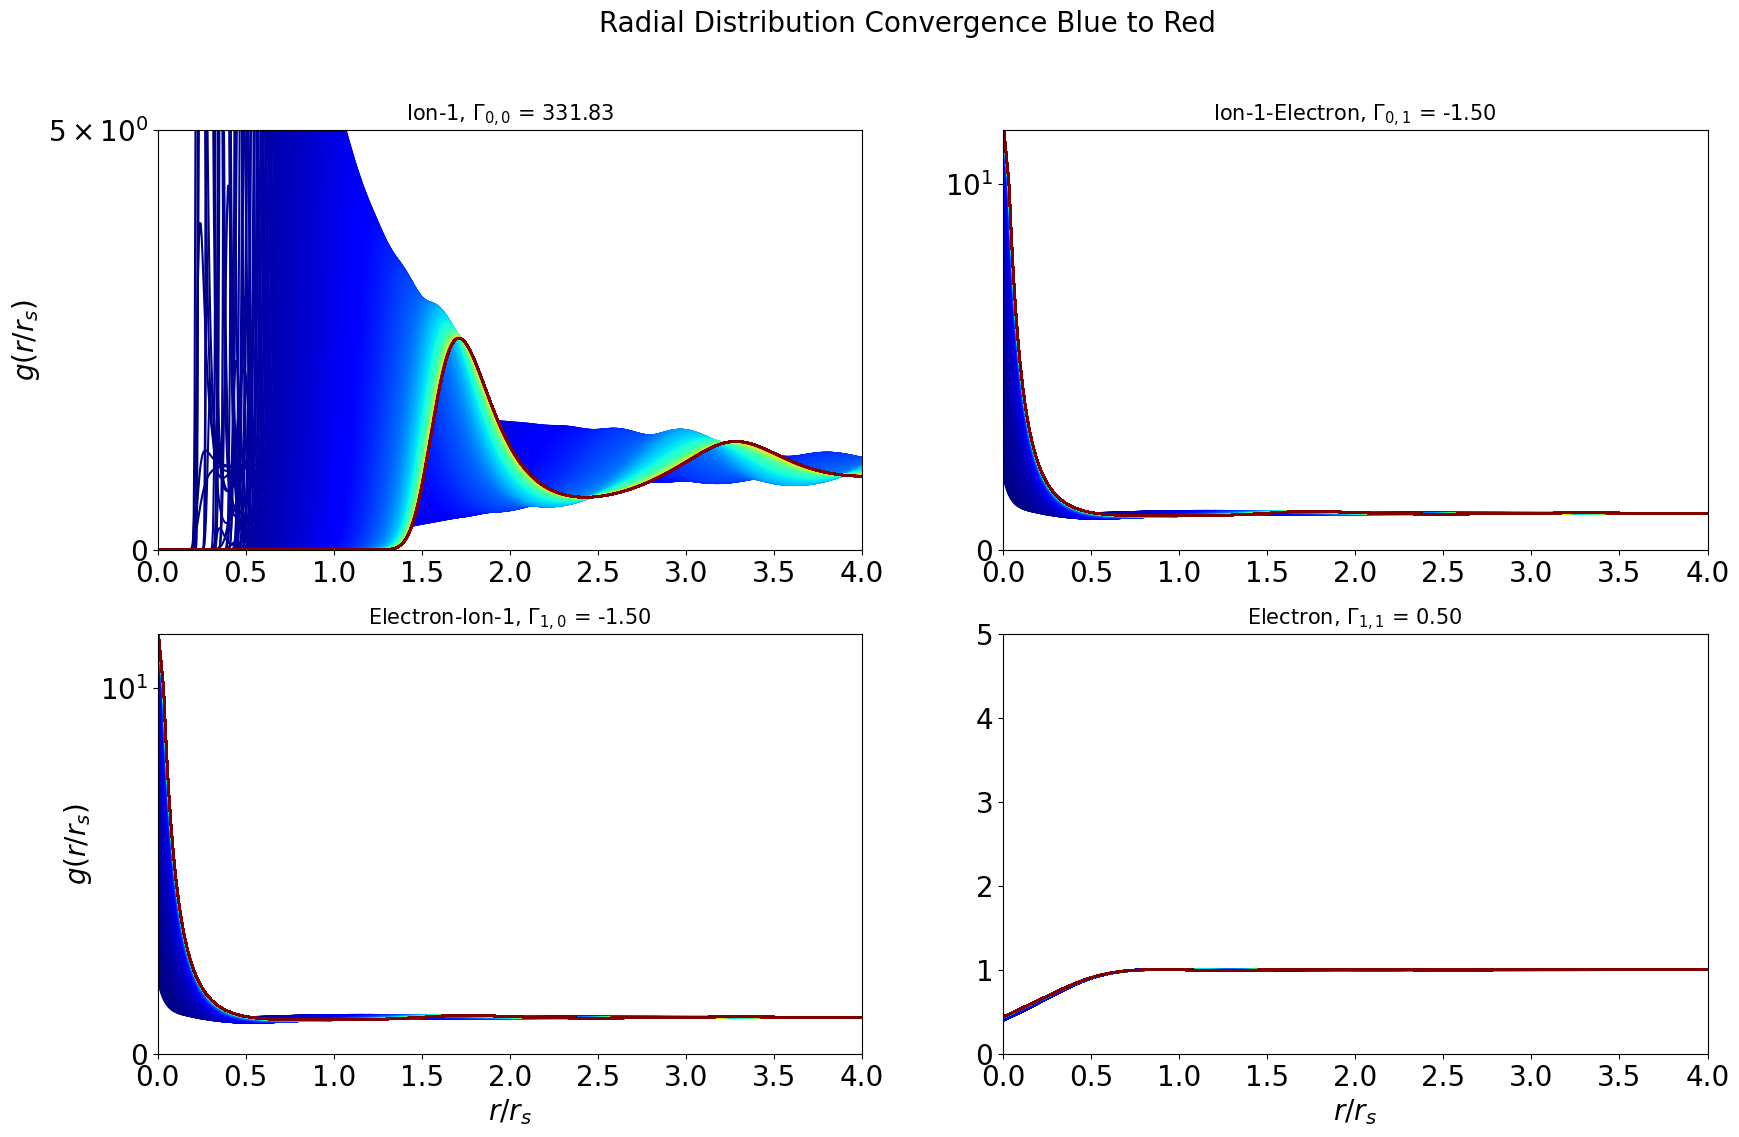

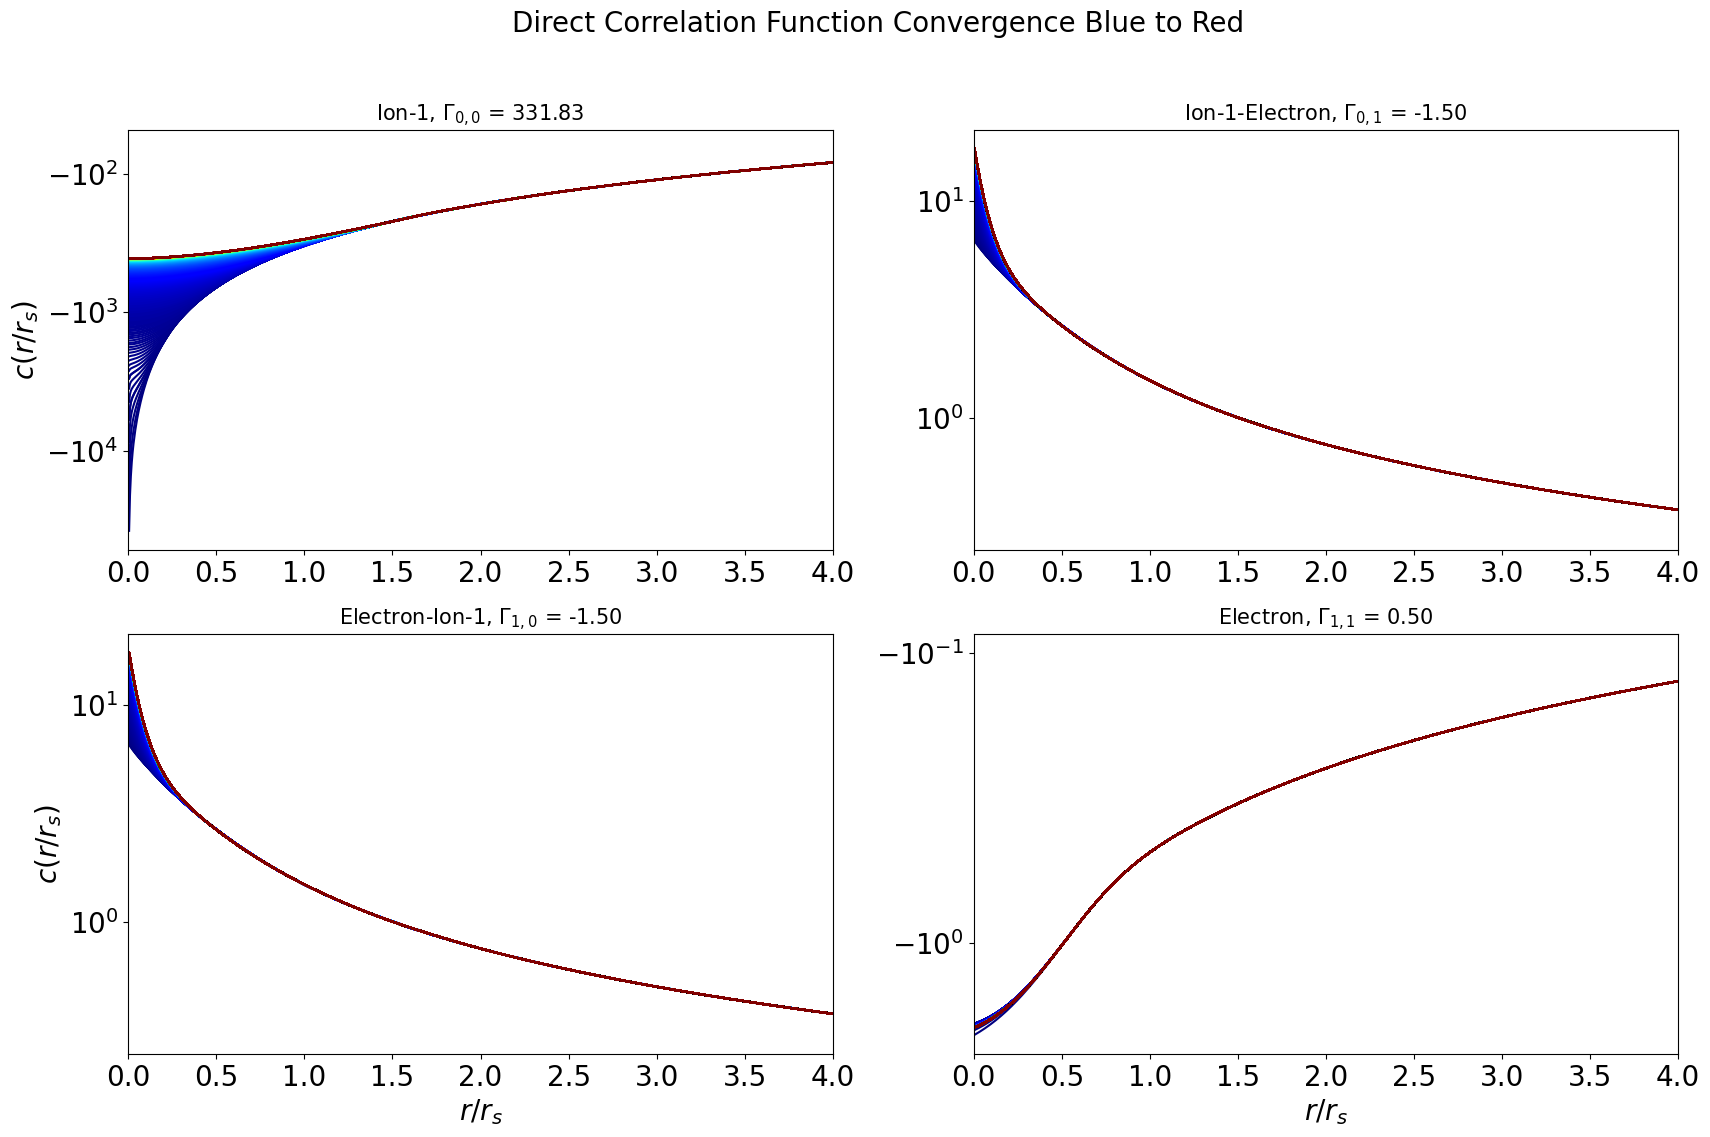

In [12]:
hnc1.plot_species_convergence_g(n_slices= int(len(hnc1.h_list)/1)  )
hnc1.plot_species_convergence_c(n_slices= int(len(hnc1.h_list)/1)  )

# New Temperature HNC

In [13]:
# ri = QSP_HNC.rs_from_n(6.03e30*aB**3)
ri = 3
Te_c = T2*eV 
Ti   = T2*eV 
Z, A = 13, 27
Zstar= 3
# "Classical-Map  Hypernetted  Chain  Calculations  for  DensePlasmas"R. Bredow1∗, Th. Bornath1, W.-D. Kraeft1, M.W.C. Dharma-wardana2,andR. Redmer1
# Tq  = 1/5*qsp.E_F 


def make_Te(Te_c, Tq):
    Te  = np.sqrt(Tq**2 + Te_c**2)
    return Te
    
qsp = QSP_HNC(Z, A, Zstar, Te_c, Ti, ri)
Tq = qsp.E_F/(1.594 - 0.3160*np.sqrt(qsp.re) + 0.0240*qsp.re)
qsp = QSP_HNC(Z, A, Zstar, make_Te(Te_c, Tq), Ti, ri)

N_species = 2
Gamma = np.array(  [[qsp.Γii,  qsp.Γei],
                    [qsp.Γei,  qsp.Γee]])


names = ["Ion-1", "Electron", ] 
kappa = 1
rho = np.array([  3/(4*np.pi), Zstar*3/(4*np.pi) ])
hnc2 = HNC_solver(N_species, Gamma=Gamma, kappa=kappa, tol=1e-8,
                 kappa_multiscale=1, rho = rho, num_iterations=int(1e3), 
                 R_max=5, N_bins=1000, names=names, dst_type=3)

βu_r_matrix = np.array([[qsp.βvii(hnc2.r_array), qsp.βvei(hnc2.r_array)],
                        [qsp.βvei(hnc2.r_array), qsp.βvee(hnc2.r_array)]])

hnc2.set_βu_matrix(βu_r_matrix)
hnc2.initialize_c_k()
hnc2.set_C_matrix()
hnc2.HNC_solve(alpha_method='best', alpha_Picard = 1e-2, alpha_oz = 1e-4, h_max=1e4)

Λee = 0.193
Λei = 0.174
Γii=3.401, Γie=-1.712, Γee=0.350 
r_i=3.000
r_e=2.080
θ  =2.07e+00
Λee = 0.186
Λei = 0.171
Γii=3.401, Γie=-1.657, Γee=0.328 
r_i=3.000
r_e=2.080
θ  =2.24e+00
 HNC min: [0.01] False Maximum number of iterations has been exceeded.
0: Err in c_r: 5.92e-01, OZ: 4.97e-01, HNC: inf


/home/zach/plasma/hnc/hnc.py:296: RuntimeWarning: overflow encountered in exp
  hnc_eqn = - 1 - self.h_r_matrix   + np.exp( -self.βu_s_r_matrix + self.h_r_matrix - c_s_r_matrix )
/home/zach/plasma/hnc/hnc.py:362: RuntimeWarning: overflow encountered in exp
  hnc_err = np.linalg.norm(- 1 - self.h_r_matrix   + np.exp( -self.βu_r_matrix + self.h_r_matrix - self.c_r_matrix ))/np.sqrt(self.N_bins*self.N_species**2)


 HNC min: [0.01] False Maximum number of iterations has been exceeded.
1: Err in c_r: 5.68e+00, OZ: 1.54e+00, HNC: inf
 HNC min: [0.5] True Optimization terminated successfully.
2: Err in c_r: 7.09e+00, OZ: 6.34e-01, HNC: 1.46e-01
 HNC min: [0.5] True Optimization terminated successfully.
3: Err in c_r: 3.68e+00, OZ: 4.69e-01, HNC: 4.05e-01
 HNC min: [0.01] False Maximum number of iterations has been exceeded.
4: Err in c_r: 3.97e+01, OZ: 3.41e+01, HNC: inf
 HNC min: [0.01] False Maximum number of iterations has been exceeded.
5: Err in c_r: 3.19e+01, OZ: 4.78e+01, HNC: inf
 HNC min: [0.01] False Maximum number of iterations has been exceeded.
6: Err in c_r: 5.29e+01, OZ: 3.86e+02, HNC: inf


/home/zach/plasma/hnc/hnc.py:342: RuntimeWarning: overflow encountered in exp
  self.h_r_matrix = -1 + np.exp(self.γs_r_matrix - self.βu_s_r_matrix) # 2. γ_r,u_s_r  -> h_r   (HNC)


 HNC min: [0.01] False Maximum number of iterations has been exceeded.
7: Err in c_r: 8.42e+01, OZ: 5.59e+02, HNC: inf
 HNC min: [0.01] False Maximum number of iterations has been exceeded.
8: Err in c_r: 9.56e+01, OZ: 4.93e+02, HNC: inf
 HNC min: [0.01] False Maximum number of iterations has been exceeded.
9: Err in c_r: 2.72e+02, OZ: 5.31e+02, HNC: inf
 HNC min: [0.01] False Maximum number of iterations has been exceeded.
10: Err in c_r: 1.04e+03, OZ: 6.55e+02, HNC: inf
 HNC min: [0.01] False Maximum number of iterations has been exceeded.
11: Err in c_r: 1.93e+02, OZ: 5.07e+02, HNC: inf
 HNC min: [0.01] False Maximum number of iterations has been exceeded.
12: Err in c_r: 1.14e+02, OZ: 2.57e+02, HNC: inf
 HNC min: [0.01] False Maximum number of iterations has been exceeded.
13: Err in c_r: 3.96e+02, OZ: 5.01e+02, HNC: inf
 HNC min: [0.01] False Maximum number of iterations has been exceeded.
14: Err in c_r: 4.71e+03, OZ: 9.63e+02, HNC: inf
 HNC min: [0.01] False Maximum number of it

KeyboardInterrupt: 

In [ ]:
hnc2.plot_species_convergence_g(n_slices= int(len(hnc2.h_list)/1)  )
hnc2.plot_species_convergence_c(n_slices= int(len(hnc2.h_list)/1)  )

# Extrapolate

In [ ]:
fig, axs = plt.subplots(ncols=N_species, nrows=N_species, figsize=(15,8))

T3 = 25
c_s_r_new = (hnc2.c_s_r_matrix - hnc1.c_s_r_matrix)/(T2-T1)*(T3 - T2) + hnc2.c_s_r_matrix

for i in range(N_species):
    for j in range(N_species):
        axs[i,j].plot(hnc1.r_array, hnc1.c_s_r_matrix[i,j],'-',label="T1")
        axs[i,j].plot(hnc2.r_array, hnc2.c_s_r_matrix[i,j],'-', label="T2")
        axs[i,j].plot(hnc2.r_array, c_s_r_new[i,j] ,'--', label="T_proj")
        axs[i,j].set_yscale('symlog',linthresh=1)
        axs[i,j].set_xscale('log')
        axs[i,j].legend()

# New Temp

In [14]:
c_s_r_new = hnc1.c_s_r_matrix

In [15]:
# ri = QSP_HNC.rs_from_n(6.03e30*aB**3)
ri = 3
Te_c = T3*eV 
Ti   = T3*eV 
Z, A = 13, 27
Zstar= 3
# "Classical-Map  Hypernetted  Chain  Calculations  for  DensePlasmas"R. Bredow1∗, Th. Bornath1, W.-D. Kraeft1, M.W.C. Dharma-wardana2,andR. Redmer1
# Tq  = 1/5*qsp.E_F 


def make_Te(Te_c, Tq):
    Te  = np.sqrt(Tq**2 + Te_c**2)
    return Te
    
qsp = QSP_HNC(Z, A, Zstar, Te_c, Ti, ri)
Tq = qsp.E_F/(1.594 - 0.3160*np.sqrt(qsp.re) + 0.0240*qsp.re)
qsp = QSP_HNC(Z, A, Zstar, make_Te(Te_c, Tq), Ti, ri)

N_species = 2
Gamma = np.array(  [[qsp.Γii,  qsp.Γei],
                    [qsp.Γei,  qsp.Γee]])


names = ["Ion-1", "Electron", ] 
kappa = 1
rho = np.array([  3/(4*np.pi), Zstar*3/(4*np.pi) ])
hnc3 = HNC_solver(N_species, Gamma=Gamma, kappa=kappa, tol=1e-8,
                 kappa_multiscale=1, rho = rho, num_iterations=int(1e3), 
                 R_max=5, N_bins=1000, names=names, dst_type=3)

βu_r_matrix = np.array([[qsp.βvii(hnc3.r_array), qsp.βvei(hnc3.r_array)],
                        [qsp.βvei(hnc3.r_array), qsp.βvee(hnc3.r_array)]])

hnc3.set_βu_matrix(βu_r_matrix)

hnc3.c_s_r_matrix[:,:,:] = c_s_r_new
hnc3.c_s_k_matrix = hnc3.FT_r_2_k_matrix(hnc3.c_s_r_matrix)
hnc3.c_r_matrix = hnc3.c_s_k_matrix - hnc3.βu_l_k_matrix
hnc3.set_C_matrix()
hnc3.HNC_solve(alpha_method='best', alpha_Picard = 1e-2, alpha_oz = 1e-4, h_max=1e4)

Λee = 0.196
Λei = 0.176
Γii=3.549, Γie=-1.744, Γee=0.363 
r_i=3.000
r_e=2.080
θ  =1.99e+00
Λee = 0.189
Λei = 0.173
Γii=3.549, Γie=-1.683, Γee=0.338 
r_i=3.000
r_e=2.080
θ  =2.16e+00
 HNC min: [0.01] False Maximum number of iterations has been exceeded.
0: Err in c_r: 5.08e+01, OZ: 3.54e+02, HNC: inf
 HNC min: [0.01] False Maximum number of iterations has been exceeded.
1: Err in c_r: 4.17e+01, OZ: 3.35e+02, HNC: inf
 HNC min: [0.01] False Maximum number of iterations has been exceeded.
2: Err in c_r: 8.15e+01, OZ: 4.16e+02, HNC: inf
 HNC min: [0.01] False Maximum number of iterations has been exceeded.
3: Err in c_r: 1.15e+02, OZ: 3.97e+02, HNC: inf
 HNC min: [0.01] False Maximum number of iterations has been exceeded.
4: Err in c_r: 2.64e+01, OZ: 4.96e+01, HNC: inf
 HNC min: [0.01] False Maximum number of iterations has been exceeded.
5: Err in c_r: 1.79e+02, OZ: 3.47e+02, HNC: inf
 HNC min: [0.01] False Maximum number of iterations has been exceeded.
6: Err in c_r: 4.74e+02, OZ: 4.35

 HNC min: [0.01] False Maximum number of iterations has been exceeded.
67: Err in c_r: 5.81e+02, OZ: 2.85e+02, HNC: inf
 HNC min: [0.01] False Maximum number of iterations has been exceeded.
68: Err in c_r: 6.04e+02, OZ: 2.70e+02, HNC: inf
 HNC min: [0.01] False Maximum number of iterations has been exceeded.
69: Err in c_r: 7.21e+02, OZ: 3.09e+02, HNC: inf
 HNC min: [0.01] False Maximum number of iterations has been exceeded.
70: Err in c_r: 3.94e+02, OZ: 2.42e+02, HNC: inf
 HNC min: [0.01] False Maximum number of iterations has been exceeded.
71: Err in c_r: 5.32e+02, OZ: 1.92e+02, HNC: inf
 HNC min: [0.01] False Maximum number of iterations has been exceeded.
72: Err in c_r: 7.19e+02, OZ: 1.64e+02, HNC: inf
 HNC min: [0.01] False Maximum number of iterations has been exceeded.
73: Err in c_r: 2.11e+02, OZ: 2.63e+01, HNC: inf
 HNC min: [0.01] False Maximum number of iterations has been exceeded.
74: Err in c_r: 2.44e+02, OZ: 7.44e+01, HNC: inf


KeyboardInterrupt: 

In [ ]:
hnc3.plot_species_convergence_g(n_slices= int(len(hnc3.h_list)/1)  )
hnc3.plot_species_convergence_c(n_slices= int(len(hnc3.h_list)/1)  )

# Extrapolate Again!

In [ ]:
fig, axs = plt.subplots(ncols=N_species, nrows=N_species, figsize=(15,8))

c_s_r_new = (hnc2.c_s_r_matrix - hnc3.c_s_r_matrix )/(T2-T3)*(T4 - T3) + hnc3.c_s_r_matrix

for i in range(N_species):
    for j in range(N_species):
        axs[i,j].plot(hnc1.r_array, hnc1.c_s_r_matrix[i,j],'-',label="T1")
        axs[i,j].plot(hnc2.r_array, hnc2.c_s_r_matrix[i,j],'-',label="T2")
        axs[i,j].plot(hnc3.r_array, hnc3.c_s_r_matrix[i,j],'-', label="T3")
        axs[i,j].plot(hnc3.r_array, c_s_r_new[i,j] ,'--', label="T_proj")
        axs[i,j].set_yscale('symlog',linthresh=1)
        axs[i,j].set_xscale('log')
        axs[i,j].legend()

In [ ]:
# ri = QSP_HNC.rs_from_n(6.03e30*aB**3)
ri = 3
Te_c = T4*eV 
Ti   = T4*eV 
Z, A = 13, 27
Zstar= 3
# "Classical-Map  Hypernetted  Chain  Calculations  for  DensePlasmas"R. Bredow1∗, Th. Bornath1, W.-D. Kraeft1, M.W.C. Dharma-wardana2,andR. Redmer1
# Tq  = 1/5*qsp.E_F 


def make_Te(Te_c, Tq):
    Te  = np.sqrt(Tq**2 + Te_c**2)
    return Te
    
qsp = QSP_HNC(Z, A, Zstar, Te_c, Ti, ri)
Tq = qsp.E_F/(1.594 - 0.3160*np.sqrt(qsp.re) + 0.0240*qsp.re)
qsp = QSP_HNC(Z, A, Zstar, make_Te(Te_c, Tq), Ti, ri)

N_species = 2
Gamma = np.array(  [[qsp.Γii,  qsp.Γei],
                    [qsp.Γei,  qsp.Γee]])


names = ["Ion-1", "Electron", ] 
kappa = 1
rho = np.array([  3/(4*np.pi), Zstar*3/(4*np.pi) ])
hnc4 = HNC_solver(N_species, Gamma=Gamma, kappa=kappa, tol=1e-8,
                 kappa_multiscale=1, rho = rho, num_iterations=int(1e3), 
                 R_max=5, N_bins=1000, names=names, dst_type=3)

βu_r_matrix = np.array([[qsp.βvii(hnc4.r_array), qsp.βvei(hnc4.r_array)],
                        [qsp.βvei(hnc4.r_array), qsp.βvee(hnc4.r_array)]])

hnc4.set_βu_matrix(βu_r_matrix)

hnc4.c_s_r_matrix[:,:,:] = c_s_r_new
hnc4.c_s_k_matrix = hnc4.FT_r_2_k_matrix(hnc4.c_s_r_matrix)
hnc4.c_r_matrix = hnc4.c_s_k_matrix - hnc4.βu_l_k_matrix
hnc4.set_C_matrix()
hnc4.HNC_solve(alpha_method='best', alpha_Picard = 1e-2, alpha_oz = 1e-4, h_max=1e4)

In [ ]:
hnc4.plot_species_convergence_g(n_slices= int(len(hnc4.h_list)/1)  )
hnc4.plot_species_convergence_c(n_slices= int(len(hnc4.h_list)/1)  )